# KFUPM<br>College of Computer Science and Engineering<br>Computer Engineering Department<br>COE 449: Privacy Enhancing Technologies

**Faris Hijazi s201578750@kfupm.edu.sa**

Fall 2019 (191)

Assignment 1: Due date Thursday 3/10/2019

## Objectives
The objectives of this assignment is the following
1. Conduct various type of attacks on a public dataset
2. Implement a k-anonymization algorithm, in particular, Mondrian mul-
tidimensional
3. Analyze the tradeoff between privacy and utility, and
4. Understand the difference between k-anonymization, l-diversity, and
t-closeness

## Dataset description

The dataset used in this assignment is the IPUMS data extracted from the
2001 US Census. The dataset has 8 attributes as described in Table 1. The
size of the dataset is 20,000 tuples (rows). All attributes include numerical
values only. For example, Gender attributes can be either 1 or 2, which
represents Male and Female, respectively. The Income attribute is the annual
income in thousand USD, for example, an income of 20 means 20,000 (20K)
annually.

## Tasks

### Task1: Linkage attack (20 pts)
Download the table named "ipums.txt" from blackboard and unzip
it. Using Table 2 as external background information, perform a
linkage attack to find the annual salary of each person in the table.
You are free to use any tool/programming language to complete
this task, e.g., Excel, Python, Java, etc.

| Name    | Age | Birth |
| ------- | --- | ----- |
| Ahmed   | 28  | 110   |
| Fatma   | 44  | 4     |
| Ali     | 17  | 199   |
| Abeer   | 34  | 260   |
| Muhamad | 40  | 15    |


In [1]:
import pandas as pd
from k_anon import *
import time
import os
from typing import List

print(
    "Faris Hijazi s201578750"
    "\nCOE 449: Privacy Enhancing Technologies - Assignment 1: K-anonynmization"
)

dataset = pd.read_csv('./dataset/ipums.csv')
# print(dataset.head())

QIs = ["Age", "Gender", "Marital status",
       "Race status", "Birth", "Language", "Occupation"]

Faris Hijazi s201578750
COE 449: Privacy Enhancing Technologies - Assignment 1: K-anonynmization


In [2]:
# importing the secondary table data (the small table for the attack)

# attack_table ("at" for short)
at = pd.read_csv('./dataset/attack_table.csv')
print(at.head())

      Name  Age  Birth
0    Ahmed   28    110
1    Fatma   44      4
2      Ali   17    199
3    Abeer   34    260
4  Muhamad   40     15


In [3]:
print('dataset columns', list(dataset.columns))
print('attack table columns', list(at.columns))
intersection = list(set(dataset.columns).intersection(at.columns))
print('intersection: ', intersection)

dataset columns ['Age', 'Gender', 'Marital status', 'Race status', 'Birth', 'Language', 'Occupation', 'Income (K)']
attack table columns ['Name', 'Age', 'Birth']
intersection:  ['Birth', 'Age']


We can see here that the only overlapping features are 'Birth' and 'Age'.

Now let's merge the tables on these values:

In [4]:
df_linked = pd.merge(dataset, at, on=intersection)
df_linked

,Age,Gender,Marital status,Race status,Birth,Language,Occupation,Income (K),Name
0,28,1,1,7,110,12,8,983,Ahmed
1,44,2,4,1,4,1,8,16,Fatma
2,44,2,1,1,4,1,8,234,Fatma
3,44,1,6,1,4,1,6,651,Fatma
4,44,2,1,1,4,12,8,460,Fatma
5,44,2,1,1,4,1,7,200,Fatma
6,44,2,1,1,4,1,10,231,Fatma
7,44,2,4,1,4,12,7,524,Fatma
8,44,2,4,1,4,1,6,580,Fatma
9,44,2,1,7,4,1,6,962,Fatma


In [5]:
# removing duplicates (Fatma and Muhamad)
df_linked_no_dups = df_linked[~df_linked.duplicated('Name', keep=False)]
df_linked_no_dups

,Age,Gender,Marital status,Race status,Birth,Language,Occupation,Income (K),Name
0,28,1,1,7,110,12,8,983,Ahmed
25,17,1,6,2,199,12,4,562,Ali
31,34,2,2,2,260,1,8,536,Abeer


In [6]:
df_linked['Name'].apply(pd.value_counts)['Ahmed'][0]

5.0

In [7]:
df_linked_no_dups[['Income (K)', 'Name']]

,Income (K),Name
0,983,Ahmed
25,562,Ali
31,536,Abeer


As can be seen above, we can know for certain some of the annual salary but not all of them.

For example, there are many "Fatma"s with Birth place "4" and age 44, so we can't be sure.

But we can be sure about the rest

### Task2: K-anonymization Implementation (30 pts)

Implement Mondrian, the k-anonymization algorithm that we dis-
cussed in the class using your preferred programming language.
The sensitive attribute is Income, while the remaining attributes
are QIs.

The steps of the algorithm is shown in Figure 1.


The bellow code will anonymize the tables for all different K values, if the tables already exist in the 'saved_tables' folder, it will just load them (to save time). It takes about 30 seconds for each table to be anonymized.

NOTE: to force anonymizing the tables anew (not loading from folder), then set `force_anon = True` (or just delete the tables in that folder).

In [8]:
# finding anonymized tables for the following k values:
Ks = [3, 5, 7, 9, 11]
anonymized_dict = {} # dictionary {k: k_anon_table}
force_anon = False
if not os.path.isdir('./saved_tables/'):
    os.mkdir('./saved_tables/')

In [9]:
# anonymize and save the tables
for i, k in enumerate(Ks, start=1):
    start_time = time.time()
    file_path = "./saved_tables/anonymized_k_{}.csv".format(k)
    
    if not force_anon and os.path.isfile(file_path): # if the tables already exist, just load them
        df_anon = pd.read_csv(file_path)
    else:
        df_anon = mondrian(dataset, k=k, QIs=QIs)
        df_anon.to_csv(file_path) # save the table in a file
    
    anonymized_dict[k] = df_anon
    print("({}/{}) Anonymized table k={} EC count: {}"
          "\n\ttime: {:.3}seconds".format(
              i, len(Ks), #progress
              k, # k
              df_anon['ec'].nunique(),
              time.time() - start_time,
  ))
    
    
#     print(df_anon.head())

(1/5) Anonymized table k=3 EC count: 119
	time: 0.039seconds
(2/5) Anonymized table k=5 EC count: 114
	time: 0.039seconds
(3/5) Anonymized table k=7 EC count: 108
	time: 0.0366seconds
(4/5) Anonymized table k=9 EC count: 105
	time: 0.042seconds
(5/5) Anonymized table k=11 EC count: 101
	time: 0.044seconds


#### Displaying sample equivalency classes

Proof that the algorithm works. The bellow displays a single equivalency cl

In [10]:
from IPython.display import display, HTML

for k in anonymized_dict:
    df = anonymized_dict[k]
    ecs = get_ecs(df)
    print('for k=', k)
    display(ecs[0].head())

for k= 3
for k= 5
for k= 7
for k= 9
for k= 11


,Unnamed: 0,Age,Gender,Marital status,Race status,Birth,Language,Occupation,Income (K),ec
0,16280,"[""40"" - ""53""]",2,6,"[""2"" - ""8""]","[""200"" - ""521""]","[""12"" - ""74""]","[""6"" - ""10""]",200,237
1,15633,"[""40"" - ""53""]",2,6,"[""2"" - ""8""]","[""200"" - ""521""]","[""12"" - ""74""]","[""6"" - ""10""]",920,237
2,16484,"[""40"" - ""53""]",2,6,"[""2"" - ""8""]","[""200"" - ""521""]","[""12"" - ""74""]","[""6"" - ""10""]",360,237


,Unnamed: 0,Age,Gender,Marital status,Race status,Birth,Language,Occupation,Income (K),ec
0,15631,21,2,6,"[""2"" - ""8""]","[""200"" - ""521""]","[""12"" - ""74""]","[""6"" - ""10""]",360,582
1,15633,51,2,6,"[""2"" - ""8""]","[""200"" - ""521""]","[""12"" - ""74""]","[""6"" - ""10""]",920,582
2,16280,40,2,6,"[""2"" - ""8""]","[""200"" - ""521""]","[""12"" - ""74""]","[""6"" - ""10""]",200,582
3,12126,37,2,6,"[""2"" - ""8""]","[""200"" - ""521""]","[""12"" - ""74""]","[""6"" - ""10""]",451,582
4,13915,23,2,6,"[""2"" - ""8""]","[""200"" - ""521""]","[""12"" - ""74""]","[""6"" - ""10""]",524,582


,Unnamed: 0,Age,Gender,Marital status,Race status,Birth,Language,Occupation,Income (K),ec
0,15631,21,2,6,"[""2"" - ""8""]","[""200"" - ""521""]","[""12"" - ""74""]","[""6"" - ""10""]",360,910
1,15633,51,2,6,"[""2"" - ""8""]","[""200"" - ""521""]","[""12"" - ""74""]","[""6"" - ""10""]",920,910
2,16280,40,2,6,"[""2"" - ""8""]","[""200"" - ""521""]","[""12"" - ""74""]","[""6"" - ""10""]",200,910
3,12126,37,2,6,"[""2"" - ""8""]","[""200"" - ""521""]","[""12"" - ""74""]","[""6"" - ""10""]",451,910
4,13915,23,2,6,"[""2"" - ""8""]","[""200"" - ""521""]","[""12"" - ""74""]","[""6"" - ""10""]",524,910


,Unnamed: 0,Age,Gender,Marital status,Race status,Birth,Language,Occupation,Income (K),ec
0,15477,25,2,6,"[""2"" - ""8""]",200,"[""12"" - ""74""]","[""6"" - ""10""]",411,1226
1,15648,18,2,6,"[""2"" - ""8""]",4,"[""12"" - ""74""]","[""6"" - ""10""]",411,1226
2,16317,18,2,6,"[""2"" - ""8""]",4,"[""12"" - ""74""]","[""6"" - ""10""]",460,1226
3,16280,40,2,6,"[""2"" - ""8""]",260,"[""12"" - ""74""]","[""6"" - ""10""]",200,1226
4,15631,21,2,6,"[""2"" - ""8""]",200,"[""12"" - ""74""]","[""6"" - ""10""]",360,1226


,Unnamed: 0,Age,Gender,Marital status,Race status,Birth,Language,Occupation,Income (K),ec
0,15477,25,2,6,"[""2"" - ""8""]",200,"[""12"" - ""74""]","[""6"" - ""10""]",411,1531
1,15648,18,2,6,"[""2"" - ""8""]",4,"[""12"" - ""74""]","[""6"" - ""10""]",411,1531
2,16317,18,2,6,"[""2"" - ""8""]",4,"[""12"" - ""74""]","[""6"" - ""10""]",460,1531
3,16280,40,2,6,"[""2"" - ""8""]",260,"[""12"" - ""74""]","[""6"" - ""10""]",200,1531
4,15631,21,2,6,"[""2"" - ""8""]",200,"[""12"" - ""74""]","[""6"" - ""10""]",360,1531


### Task3: Utility-privacy trade off (30 pts)
Using your implementation of Mondrian algorithm, or any avail-
able k-anonymization tool, e.g., [1] and [2], find the anonymized
table with k=3,5,7,9, and 11.
For each anonymized table compute the Discernibility metric CDM,
the normalized average equivalence class CAV G, and generalized
information loss ILOSS.

$$
C_{D M}=\sum_{E \in E C}|E|^{2}
$$

Where |E| is the size of equivalence class E, and EC is the set of all equivalence classes 

$$
C_{A V G}=\left(\frac{|T|}{|E C|}\right) / k
$$

Where |EC| is the number of equivalence classes 

$$
I L O S S=\frac{1}{|T| \cdot n} \sum_{i=1 |}^{n} \sum_{j=1}^{|T|} \frac{U_{i j}-L_{i j}}{U_{i}-L_{i}}
$$

Where 𝑈_𝑖𝑗 and 𝐿_𝑖𝑗 is the upper and lower value of the generalized range of attribute *i* and record *j*,  
and 𝑈_𝑖 and 𝐿_𝑖 is the upper and lower value of attribute i


#### Applying metrics

In [11]:
from metrics import *
import matplotlib.pyplot as plt

metrics = ['c_dm', 'c_avg', 'iloss']
# dictionary of dictionaries, a dictionary for each metric
metric_results = {
    'c_dm': {}, # sub-dictionary: {k: metric_result}
    'c_avg': {},
    'iloss': {}
}
# metric_results[metric_name][k]

start_time = time.time()

for k in anonymized_dict:
    df = anonymized_dict[k]
    ecs = get_ecs(df)
    for metric in metrics:
        metric_func = eval(metric) # eval string into the function
        metric_results[metric][k] = metric_func(df, ecs=ecs, k=k)

print('duration: {:.3}s'.format(time.time() - start_time))

duration: 51.8s


In [12]:
metric_results

{'c_dm': {3: 15940298, 5: 15940418, 7: 15941200, 9: 15941668, 11: 15942266},
 'c_avg': {3: 56.022408963585434,
  5: 35.08771929824562,
  7: 26.455026455026456,
  9: 21.164021164021165,
  11: 18.001800180018},
 'iloss': {3: 0.3241866511005079,
  5: 0.3241311883326825,
  7: 0.3240424796642782,
  9: 0.32400323660140523,
  11: 0.32389330717430614}}

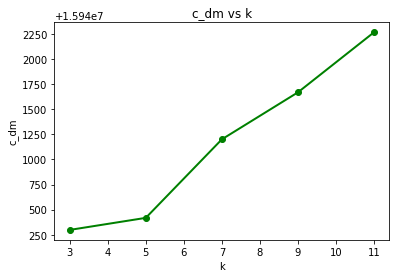

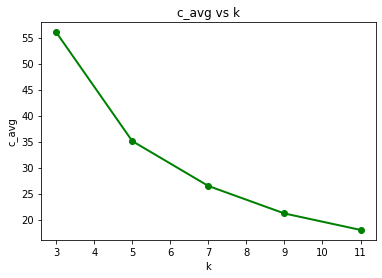

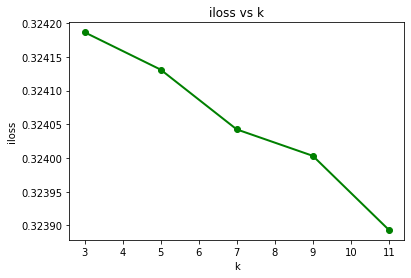

In [13]:

K = list(anonymized_dict.keys())
for metric in metrics:
    Y = [metric_results[metric][k] for k in K]
    
    plt.figure()
    plt.xticks = K
    plt.xlabel('k')
    plt.ylabel(metric)
    plt.title(metric + ' vs k')
    plt.plot(K, Y, 'go-', label=metric, linewidth=2)

Then, draw a figure for each metric against the value of k to depict
the privacy trade off.

The x-axis should be the value of k, while
the y-axis should be the value of the respective utility metric.

### Task4: L-diversity (20 pts)
Using the anonymized table with k = 3 from Task 3, check if
the 3-anonymized table is distinct L-diverse and entropy L-diverse
for each L = 2 and 5. In the case when the 3-anonymized table
violates the L-diversity requirements, print at least one equivalence
class that violates the diversity requirement.

In [14]:
table_3 = anonymized_dict[3]
ls = [2, 5]
ecs = get_ecs(table_3)

for l in ls:
    print("is {}-diverse (distinct):".format(l), is_l_diverse_distinct(ecs, l=l, sens_attr='Income (K)'))
    print("is {}-diverse (entropy):".format(l) , is_l_diverse_entropy(ecs, l=l, sens_attr='Income (K)'))


is 2-diverse (distinct): True
is 2-diverse (entropy): True
is 5-diverse (distinct): False
is 5-diverse (entropy): False


### Task5: (optional) Skewness and similarity attacks and t-closeness(bonus 10 pts)
Is this dataset susciptable to the skewness and similarity attacks?
Will t-closeness improve the privacy of the anonymized table?
Submission
The due date of this assignment is 11:59PM 3/10/2019. Please upload all files
on the assignment page on BlackBoard. You need to submit the following:

1. A report containing your response to tasks 1,3, and 4.
2. The source code of the implementation of Mondrian algorithm.

## References
1. ARX - Data anonymization tool. https://arx.deidentifier.org/.
2. Python implemntation for Mondrian. https://github.com/qiyuangong/Mondrian.